# Day085
## 訓練神經網路的細節與技巧 - 使用 callbacks 函數做 earlystop
### 假如能夠早點停下來就好
- 在 Overfitting 前停下，避免 model weights 被搞爛，注意：Earlystop 不會使模型得到更好的結果，僅是避免更糟

### [earlystop in Keras](https://keras.io/callbacks/#earlystopping)
>　from keras.callbacks import EarlyStopping<br>
earlystop = EarlyStopping(monitor = 'val_acc'<br>
patience=5<br>
verbose=1)

> model.fit(train_x, train_y,<br>
epochs=EPOCHS,<br>
batch_size=BATCH_SIZE,<br>
validation_data=(x_test, y_test),<br>
callback=[earlystop])

注意: .fit 的 callback 要是 list 的形式

## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import keras
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=units, activation='relu', name="hidden_layer"+str(i+1))(input_layer)
            x = keras.layers.BatchNormalization()(x)

        else:
            x = keras.layers.Dense(units=units, activation='relu', name="hidden_layer"+str(i+1))(x)
            x = keras.layers.BatchNormalization()(x)

    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your hyper-parameters
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [7]:
# 載入 Callbacks
"""
Earlystop setting
"""
from keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor="val_loss", 
                          patience=5, 
                          verbose=1
                          )


"""
Your Training loop and Plot the results
"""
model = build_mlp(x_train.shape[1:])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batc

In [8]:
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)

model.fit(x_train, y_train,
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          validation_data=(x_test, y_test),
          shuffle=True,
          callbacks=[earlystop])

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 90us/step - loss: 2.2158 - acc: 0.2655 - val_loss: 2.3295 - val_acc: 0.3011
Epoch 2/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.7355 - acc: 0.3954 - val_loss: 1.7997 - val_acc: 0.3872
Epoch 3/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.6124 - acc: 0.4358 - val_loss: 1.6881 - val_acc: 0.4136
Epoch 4/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.5401 - acc: 0.4628 - val_loss: 1.6189 - val_acc: 0.4296
Epoch 5/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.4841 - acc: 0.4822 - val_loss: 1.5894 - val_acc: 0.4423
Epoch 6/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.4391 - acc: 0.4953 - val_loss: 1.5609 - val_acc: 0.4548
Epoch 7/50
50000/50000 [==============================] - 3s 53us/step - loss: 1

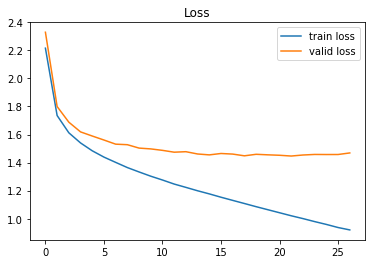

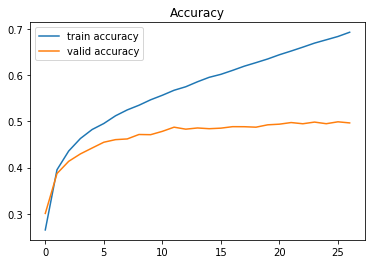

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

### monitor改為val_acc

In [10]:
earlystop = EarlyStopping(monitor="val_acc", 
                          patience=5, 
                          verbose=1
                          )
model = build_mlp(x_train.shape[1:])
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)

model.fit(x_train, y_train,
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          validation_data=(x_test, y_test),
          shuffle=True,
          callbacks=[earlystop])

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 52us/step - loss: 2.2061 - acc: 0.2699 - val_loss: 2.0940 - val_acc: 0.3287
Epoch 2/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.7426 - acc: 0.3932 - val_loss: 1.7716 - val_acc: 0.3911
Epoch 3/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.6164 - acc: 0.4335 - val_loss: 1.6774 - val_acc: 0.4061
Epoch 4/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.5433 - acc: 0.4609 - val_loss: 1.6232 - val_acc: 0.4287
Epoch 5/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.4915 - acc: 0.4766 - val_loss: 1.5877 - val_acc: 0.4377
Epoch 6/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.4443 - acc: 0.4924 - val_loss: 1.5484 - val_acc: 0.4506
Epoch 7/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.4056 - acc: 0.5061 - val_loss: 1.5446 - val_acc

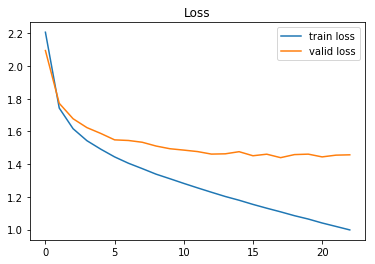

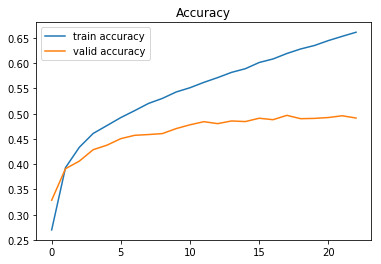

In [11]:
plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

> 改成val_acc後，比較早停止，但overfitting早就發生了...

### patience改為10

In [12]:
earlystop = EarlyStopping(monitor="val_loss", 
                          patience=10, 
                          verbose=1
                          )
model = build_mlp(x_train.shape[1:])
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)

model.fit(x_train, y_train,
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          validation_data=(x_test, y_test),
          shuffle=True,
          callbacks=[earlystop])

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 55us/step - loss: 2.2350 - acc: 0.2636 - val_loss: 2.1055 - val_acc: 0.3161
Epoch 2/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.7465 - acc: 0.3923 - val_loss: 1.8023 - val_acc: 0.3838
Epoch 3/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.6186 - acc: 0.4320 - val_loss: 1.6864 - val_acc: 0.4112
Epoch 4/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.5427 - acc: 0.4596 - val_loss: 1.6343 - val_acc: 0.4260
Epoch 5/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.4867 - acc: 0.4799 - val_loss: 1.5931 - val_acc: 0.4364
Epoch 6/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.4418 - acc: 0.4951 - val_loss: 1.5649 - val_acc: 0.4452
Epoch 7/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.4020 - acc: 0.5100 - val_loss: 1.5555 - val_acc

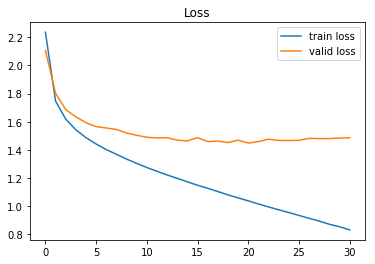

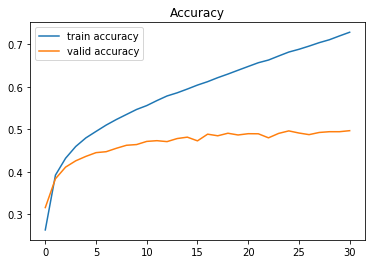

In [13]:
plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

### patience改為25

In [14]:
earlystop = EarlyStopping(monitor="val_acc", 
                          patience=25, 
                          verbose=1
                          )

model = build_mlp(x_train.shape[1:])
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)

model.fit(x_train, y_train,
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          validation_data=(x_test, y_test),
          shuffle=True,
          callbacks=[earlystop])

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 56us/step - loss: 2.2058 - acc: 0.2689 - val_loss: 2.1588 - val_acc: 0.2957
Epoch 2/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.7399 - acc: 0.3940 - val_loss: 1.8116 - val_acc: 0.3783
Epoch 3/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.6153 - acc: 0.4338 - val_loss: 1.6931 - val_acc: 0.4099
Epoch 4/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.5423 - acc: 0.4612 - val_loss: 1.6423 - val_acc: 0.4294
Epoch 5/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.4883 - acc: 0.4798 - val_loss: 1.6074 - val_acc: 0.4332
Epoch 6/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.4440 - acc: 0.4958 - val_loss: 1.5615 - val_acc: 0.4485
Epoch 7/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.4055 - acc: 0.5083 - val_loss: 1.5443 - val_acc

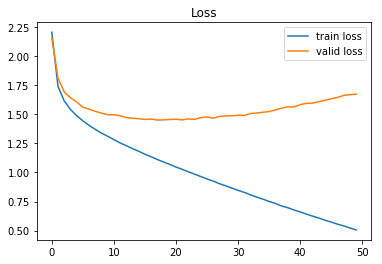

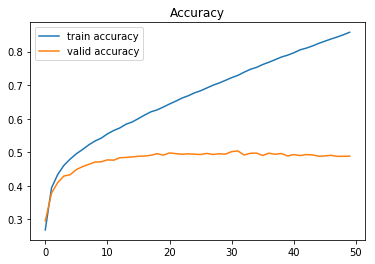

In [15]:
plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

> 越有耐心越慢停止